# Markov Decision Process
This notebook accompanies Lecture of Markov Decision Process.

MDP Defined by: (𝑆,𝐴,𝑇,𝑅,𝛾)

- 𝑆: Set of possible states
- 𝐴: Actions(s) – Possible actions from state s
- 𝑇(𝑠,𝑎,𝑠’): Probability of 𝑠’ if taking action 𝑎 in state 𝑠
- 𝑅(𝑠): Reward for being in a state
- IsEnd(s): Whether at the end of the game
- 0 ≤ 𝛾 ≤ 1: Discount factor

The following class `Grid` defines the Markov Decision Processactor


In [1]:
import random
class Grid():
    def __init__(self, maze_string, non_terminal_reward = -.04):
        # Read the file and set the height and width of the maze
        contents = maze_string
                
        # if no cost and no comma, assign cost of 1
        if contents.count(",") == 0:
            contents = contents.replace(' ','1')
            contents = contents.splitlines()
            contents = [','.join(list(c)) for c in contents]
        else:
            contents = contents.splitlines()
            
        contents = [line.split(',') for line in contents]
        
        self.height = len(contents)
        self.width = max(len(line) for line in contents)
        self.cell_size = 50
        self.cell_border = 2
        self.terminal = [] ## list of terminal states
        self.min_reward = float('inf')
        self.max_reward = float('-inf')
        self.non_terminal_reward = non_terminal_reward
        
        # Keep track of walls
        self.walls = []
        for i in range(self.height):
            row = []
            for j in range(self.width):
                try:            
                    if contents[i][j].find('@') == 0: # terminal states
                        self.terminal.append((i, j))
                        val = int(contents[i][j].lstrip('@'))
                        if val < self.min_reward:
                            self.min_reward = val
                        if val > self.max_reward:
                            self.max_reward = val
                            
                        row.append(val)
                        
                    elif contents[i][j].lstrip('-+').isdigit():
                        val = int(contents[i][j])
                        if val < self.min_reward:
                            self.min_reward = val
                        if val > self.max_reward:
                            self.max_reward = val        
                        row.append(val)
                    elif contents[i][j]== 'n':
                        row.append(self.non_terminal_reward)
                    else:
                        row.append('#')
                except IndexError:
                    row.append('x')
            self.walls.append(row)
            
    def terminal_test(self, state):
        return state in self.terminal

    def actions(self,state):
        if state in self.terminal:
            return []
        else:
            return ("up", "down", "left", "right")

    def step(self, state, pi):
        r = self.results(state,pi[state[0]][state[1]])
        pr = [p for p, (u,v) in r]   
        st = [s for p, s in r]
        return random.choices(st, pr, k=1)[0]
        
    def episode(self, state, pi, gamma=1):
        path = []
        r = self.walls[state[0]][state[1]]
        path.append(state)
        while(not problem.terminal_test(state)):
            gamma *= gamma
            state = problem.step(state, pi)
            r += gamma*self.walls[state[0]][state[1]]
            path.append(state)
        return path, r

    def results(self, state, action):    
        row, col = state
        result = []

        if action == "up":
            candidates = [
                (0.8, (row - 1, col)),
                (0.1, (row, col - 1)),
                (0.1, (row, col + 1))
            ]
            
            for prob, (r, c) in candidates:
                if 0 <= r < self.height and 0 <= c < self.width and self.walls[r][c] != '#' :
                    result.append((prob, (r, c)))
                else:
                    result.append((prob, (row, col)))

        elif action == "down":
            candidates = [
                (0.8, (row + 1, col)),
                (0.1, (row, col - 1)),
                (0.1, (row, col + 1))
            ]
            for prob, (r, c) in candidates:
                if 0 <= r < self.height and 0 <= c < self.width and self.walls[r][c] != '#' :
                    result.append((prob, (r, c)))
                else:
                    result.append((prob, (row, col)))

        elif action == "left":
            candidates = [
                (0.1, (row + 1, col)),
                (0.8, (row, col - 1)),
                (0.1, (row - 1, col))
            ]
            for prob, (r, c) in candidates:
                if 0 <= r < self.height and 0 <= c < self.width and self.walls[r][c] != '#' :
                    result.append((prob, (r, c)))
                else:
                    result.append((prob, (row, col)))

        elif action == "right":
            candidates = [
                (0.1, (row + 1, col)),
                (0.8, (row, col + 1)),
                (0.1, (row - 1, col))
            ]
            for prob, (r, c) in candidates:
                if 0 <= r < self.height and 0 <= c < self.width and self.walls[r][c] != '#' :
                    result.append((prob, (r, c)))
                else:
                    result.append((prob, (row, col)))
                    
        return result
        

    # for visualization    
    def output_image(self, policy = None, V = None, path=None):
        from PIL import Image, ImageDraw, ImageFont
        
        img = Image.new(
            "RGBA",
            (self.cell_size*self.width, self.cell_size*self.height),
            "black"
        )
         
        draw = ImageDraw.Draw(img)
        #font = ImageFont.truetype("arial.ttf", 48)
        
        for i, row in enumerate(self.walls):
            for j, col in enumerate(row):

                # Walls
                if col == '#':
                    fill = (0, 0, 0, 255) # full transparency
                    
                # Empty cell
                elif col < 0:
                    fill = (237, 240, 255 - int(255*abs(col)/abs(self.min_reward)), 50)
                elif col >= 0:
                    fill = (255-int(255*col/self.max_reward), 240 , 240, 50)    

                if path and (i,j) in path:
                    fill = (0, 255, 0, 100)

                # Draw cell
                if col != '@':
                    if (i,j) not in self.terminal:
                        draw.rectangle(
                            ([(j * self.cell_size + self.cell_border, i * self.cell_size + self.cell_border),
                              ((j + 1) * self.cell_size - self.cell_border, (i + 1) * self.cell_size - self.cell_border)]),
                            fill=fill
                        )
                    else:
                        draw.rectangle(
                            ([(j * self.cell_size + self.cell_border, i * self.cell_size + self.cell_border),
                              ((j + 1) * self.cell_size - self.cell_border, (i + 1) * self.cell_size - self.cell_border)]),
                            fill=fill, outline=(255,0,0)
                        )
                        
        if V is not None:
            for i, row in enumerate(self.walls):
                for j, col in enumerate(row):
                    if self.walls[i][j] != '#':
                        draw.text((j*self.cell_size+10, i*self.cell_size+10), str(round(V[i][j],2)), (50,50,50))
        else:
            for i, row in enumerate(self.walls):
                for j, col in enumerate(row):
                    if self.walls[i][j] != '#' and self.walls[i][j] != self.non_terminal_reward:
                        draw.text((j*self.cell_size+10, i*self.cell_size+10), str(self.walls[i][j]), (0,0,0))



        # Draw arrows based on policy
        if policy is not None:
            arrow_size = min(self.cell_size // 3, 10)
            for i in range(len(policy)):
                for j in range(len(policy[0])):
                    x_center = j * self.cell_size + self.cell_size // 2
                    y_center = i * self.cell_size + self.cell_size // 2
                    if policy[i][j] == 'up':
                        draw.line((x_center - arrow_size // 2,
                                   y_center + arrow_size // 2,
                                   x_center,
                                   y_center - arrow_size // 2),
                                  fill='blue', width=2)
                        draw.line((x_center + arrow_size // 2,
                                   y_center + arrow_size // 2,
                                   x_center,
                                   y_center - arrow_size // 2),
                                  fill='blue', width=2)
                    elif policy[i][j] == 'down':
                        draw.line((x_center - arrow_size // 2,
                                   y_center - arrow_size // 2,
                                   x_center,
                                   y_center + arrow_size // 2),
                                  fill='blue', width=2)
                        draw.line((x_center + arrow_size // 2,
                                   y_center - arrow_size // 2,
                                   x_center,
                                   y_center + arrow_size // 2),
                                  fill='blue', width=2)
                    elif policy[i][j] == 'right':
                        draw.line((x_center - arrow_size // 2,
                                    y_center - arrow_size // 2,
                                    x_center + arrow_size // 2,
                                    y_center),
                                    fill='blue', width=2)
                        draw.line((x_center - arrow_size // 2,
                                    y_center + arrow_size // 2,
                                    x_center + arrow_size // 2,
                                    y_center),
                                    fill='blue', width=2)
                    elif policy[i][j] == 'left':
                        draw.line((x_center + arrow_size // 2,
                                    y_center - arrow_size // 2,
                                    x_center - arrow_size // 2,
                                    y_center),
                                    fill='blue', width=2)
                        draw.line((x_center + arrow_size // 2,
                                    y_center + arrow_size // 2,
                                    x_center - arrow_size // 2,
                                    y_center),
                                    fill='blue', width=2)
                                                                                                
        #img = Image.alpha_composite(img_mars.convert("RGBA"), img)
        #img.save('test.png')
        return img


### Maze format

- use # for walls, 
- use numbers (e.g 20, -20) for rewards for non-terminal states
- use x for terminal states i.e x10 means it is a terminal state with rewards 10
- use n for non terminal states that have 0 reward. The Grid class accepts a value to set the reward of the non-terminal state to any value

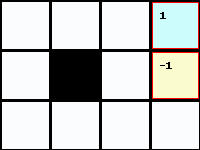

In [2]:
maze1 = "n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n\n\
n,n,n,-5,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n\n\
n,n,n,-5,-10,-5,-5,-5,-5,n,n,n,n,n,n,n,n,n,-10,-10\n\
n,n,n,-5,-5,-10,-10,-5,n,n,n,n,n,n,n,n,n,-10,@-30,-10\n\
n,n,n,-5,-10,@-30,-10,-10,n,n,n,n,n,n,n,n,-10,-10,-10,-10\n\
n,n,n,n,n,-10,-10,n,n,n,n,n,n,n,n,n,n,n,n,n\n\
n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n\n\
-3,-3,n,n,n,n,n,n,n,n,n,n,n,n,@30,n,n,n,n,n\n\
n,n,-3,-3,-3,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n\n\
n,n,n,n,n,-3,-3,n,n,n,n,n,n,n,n,n,n,n,n,n\n\
n,n,n,n,n,n,n,-3,-3,-3,-3,-3,-3,-3,-3,-3,-3,-3,-3,n\n\
n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,-3\n\
n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,@60,n,n,n\n\
n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n\n\
n,n,n,n,n,n,n,n,n,-3,-3,n,n,n,n,n,n,n,n,n\n\
n,n,n,n,n,n,n,n,-3,-3,n,n,n,n,n,n,n,n,n,n\n\
-10,-10,-10,-10,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n\n\
-10,-10,-10,-10,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n\n\
-10,-10,-10,-10,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n"

# this maze is from lecture slide. you can test you algorithm on this maze to see if you get the same value
maze2 = "n,n,@5\n\
n,n,@-5"

# this maze is from lecture slide. you can test you algorithm on this maze to see if you get the same value
maze3 = "n,n,n,@1\n\
n,#,n,@-1\n\
n,n,n,n"

problem = Grid(maze3, non_terminal_reward=-0.04)
problem.output_image()


In the figure above, the terminal states are drawn with red outline. The rewards are written in the grid cell. The reward of all the non terminal states can be set by passing the argument as:
```problem = Grid(maze1, non_terminal_reward=-2)```

[(2, 3), (2, 2), (2, 1), (2, 1), (2, 1), (2, 0), (2, 0), (1, 0), (0, 0), (0, 1), (0, 2), (0, 3)] 0.56
0.38263999999997916


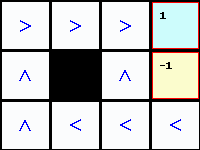

In [3]:
# 
p = problem.results((0,0), 'right')
#print(p)
#
pi1 = [['right', 'right', 'right', None],
       ['up', None, 'up', None],
       ['up', 'left', 'left', 'left']]
pi2 = [['right', 'right', 'right', None],
       ['up', None, 'down', None],
       ['up', 'left', 'up', 'left']]
path, r = problem.episode((2,3), pi1, gamma=1)
print(path, r)
rsum = 0
for i in range(10000):
    path, r = problem.episode((2,3), pi1, gamma=1)
    rsum += r
print(rsum/10000)
problem.output_image(policy=pi1)

In [4]:
problem.results((1,3), 'right')

[(0.1, (2, 3)), (0.8, (1, 3)), (0.1, (0, 3))]

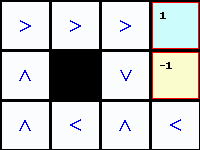

In [5]:
problem.output_image(policy=pi2)

# Policy Evaluation Algorithm

In [6]:
def policy_iteration(problem, pi, gamma = 0.9, niter = 100, epsilon = .01):
    # initialize to zero
    V = [[0]*problem.width for i in range(problem.height)]
    
    for t in range(niter):
        delta = 0
        # for each state
        U = [[i for i in row] for row in V] 
        
        for i in range(len(problem.walls)):
            for j in range(len(problem.walls[0])):
                if t == 0 and (i,j) in problem.terminal:
                    V[i][j] = problem.walls[i][j]
                    
    
                elif (i,j) not in problem.terminal and problem.walls[i][j] != '#':
                    V[i][j] = problem.walls[i][j] + gamma * sum( prob*U[u][v] for (prob, (u,v)) in problem.results((i,j), pi[i][j])) 
                                                 
                
        delta = max(delta, sum([abs(row[0][i]-row[1][i]) for row in zip(U,V) for i in range(len(row[0])) ]))
        if delta <= epsilon * (1 - gamma) / gamma:
            print(f"Converged after {t} iterations")
            return V
            
    print(f"Not converged after {t} iterations")
    return V

## Evaluating some policies from lecture notes

Not converged after 19 iterations


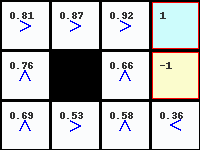

In [7]:
problem = Grid(maze3, non_terminal_reward=-0.04)
pi1 = [['right', 'right', 'right', None],
       ['up', None, 'up', None],
       ['up', 'right', 'up', 'left']]
V = policy_iteration(problem, pi1, gamma = 1, niter = 20, epsilon = .00001)
problem.output_image(pi1, V)

Converged after 17 iterations


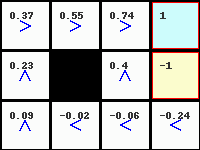

In [8]:
problem = Grid(maze3, non_terminal_reward=-.08)
pi2 = [['right', 'right', 'right', None],
      ['up', None, 'up', None],
      ['up', 'left', 'left', 'left']]
V = policy_iteration(problem, pi2, gamma = 0.9, niter = 100, epsilon = .01)
problem.output_image(pi2,V)

Not converged after 499 iterations


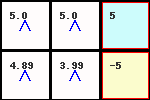

In [9]:
problem = Grid(maze2, non_terminal_reward=0)
pi1 = [['up', 'up', None],
       ['up', 'up', None]]
V = policy_iteration(problem, pi1, gamma = 1, niter = 500, epsilon = .001)
problem.output_image(pi1, V)

Converged after 94 iterations


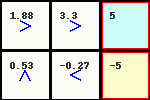

In [10]:
problem = Grid(maze2, non_terminal_reward=-1)
pi1 = [['right', 'right', None],
       ['up', 'left', None]]
V = policy_iteration(problem, pi1, gamma = 1, niter = 100, epsilon = .01)
problem.output_image(pi1, V)

# Value Iteration Algorithm to find the best policy:

Implement the value iteration algorithm

```
def value_iteration(problem, gamma = 0.9, niter = 100):
# The function should return the value V of the best policy. V would be two dimensional list equal to the size of problem.walls
```

Also Implement the function

```
def best_policy(problem, V):
#This function will take the value of the policy and return the best policy pi. pi will be a two dimensional list containing the optimal action from each state
```

In [11]:
def value_iteration(problem, gamma = 0.9, niter = 100, epsilon = .01):
    # initialize to zero
    V = [[0]*problem.width for i in range(problem.height)]
    
    for t in range(niter):
        delta = 0
        # for each state
        U = [[i for i in row] for row in V] 
        
        for i in range(len(problem.walls)):
            for j in range(len(problem.walls[0])):
                if t == 0 and (i,j) in problem.terminal:
                    V[i][j] = problem.walls[i][j]
                    
    
                elif (i,j) not in problem.terminal and problem.walls[i][j] != '#':
                    V[i][j] = problem.walls[i][j] + gamma * max(sum( prob*U[u][v] for (prob, (u,v)) in problem.results((i,j), a)) 
                                                 for a in problem.actions((i,j)))
                
        delta = max(delta, sum([abs(row[0][i]-row[1][i]) for row in zip(U,V) for i in range(len(row[0])) ]))
        if delta <= epsilon * (1 - gamma) / gamma:
            print(f"Converged after {t} iterations")
            return V
            
    print(f"Not converged after {t} iterations")
    return V

In [12]:
from operator import itemgetter

def best_policy(problem, V):
    """Given an Problem and a Value function V, determine the best policy"""
    pi = [[None]*problem.width for i in range(problem.height)]

    for i in range(len(problem.walls)):
        for j in range(len(problem.walls[0])):
            if (i,j) not in problem.terminal and problem.walls[i][j] != '#':
                val = [sum( prob*V[u][v] for (prob, (u,v)) in problem.results((i,j), a)) 
                                           for a in problem.actions((i,j))]
                index,_ = max(enumerate(val), key=itemgetter(1))
                pi[i][j] = problem.actions((i,j))[index]

    return pi

Converged after 92 iterations


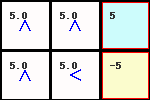

In [13]:
# After implementing the algorithm use the following to display the policy
problem = Grid(maze2, non_terminal_reward=0)
V = value_iteration(problem, gamma=1, niter=100)
pi = best_policy(problem, V)
problem.output_image(pi, V)

Converged after 3 iterations


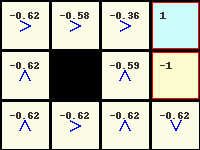

In [14]:
problem = Grid(maze3, non_terminal_reward=-0.5)
V = value_iteration(problem, gamma = .2, niter=50)
pi = best_policy(problem, V)
problem.output_image(pi, V)